In [2]:
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

## Задание 1

In [4]:
df = sns.load_dataset('anscombe')
x_1 = df.loc[df['dataset']=='I']
x_2 = df.loc[df['dataset']=='II']
x_3 = df.loc[df['dataset']=='III']
x_4 = df.loc[df['dataset']=='IV']
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [5]:
Ex = []
Ey = []
Dx = []
Dy = []
Corr = []
for i in (x_1, x_2, x_3, x_4):
    Ex.append(i.x.mean())
    Ey.append(i.y.mean().round(2))
    Dx.append(i.x.var(ddof=0))
    Dy.append(i.y.var(ddof=0).round(2))
    Corr.append(i.corr().round(2))
Ex, Ey, Dx, Dy, Corr

C:\Users\Матвей\AppData\Local\Temp\ipykernel_2876\3833124396.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr.append(i.corr().round(2))


([9.0, 9.0, 9.0, 9.0],
 [7.5, 7.5, 7.5, 7.5],
 [10.0, 10.0, 10.0, 10.0],
 [3.75, 3.75, 3.75, 3.75],
 [      x     y
  x  1.00  0.82
  y  0.82  1.00,
        x     y
  x  1.00  0.82
  y  0.82  1.00,
        x     y
  x  1.00  0.82
  y  0.82  1.00,
        x     y
  x  1.00  0.82
  y  0.82  1.00])

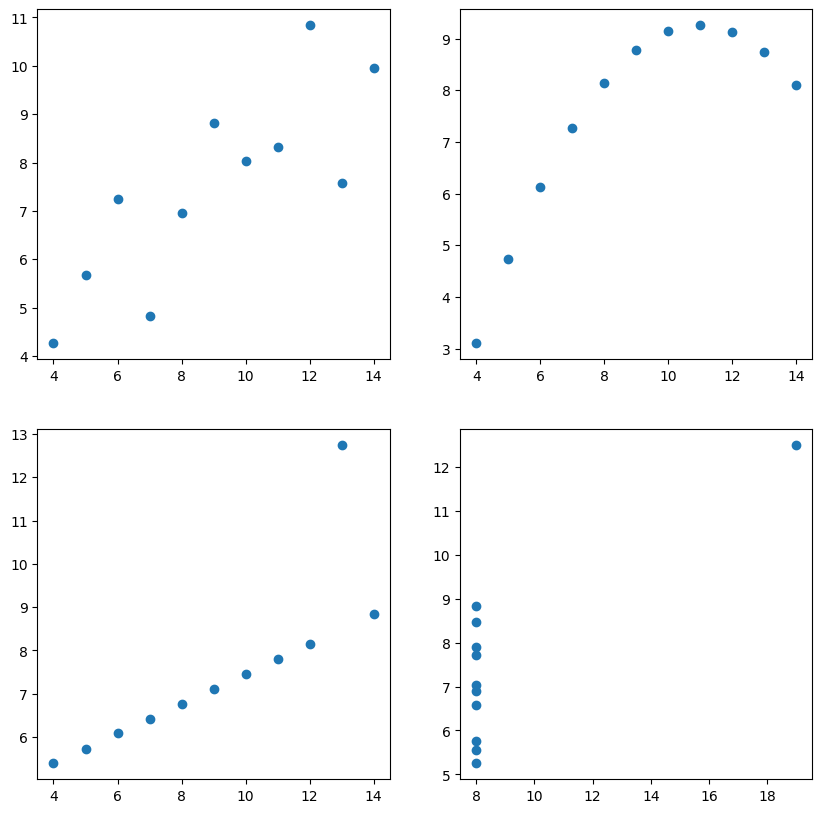

In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
axes[0,0].scatter(x_1.x, x_1.y)
axes[0,1].scatter(x_2.x, x_2.y)
axes[1,0].scatter(x_3.x, x_3.y)
axes[1,1].scatter(x_4.x, x_4.y)


Получился интересный результат: средние, дисперсии и корреляции для 4х выборок совпадают, а визуализации выборок очень сильно отличаются!

## Задание 2

In [76]:
A = np.random.randint(-5,5,(5, 3))
B = np.random.randint(-5,5,(8, 4))
C = np.random.randint(-5,5,(11, 5))

A_1 = A - A.mean(axis=0, keepdims=True)
B_1 = B - B.mean(axis=0, keepdims=True)
C_1 = C - C.mean(axis=0, keepdims=True)

A_new = np.hstack((A, np.ones((5,1))))
B_new = np.hstack((B, np.ones((8,1))))
C_new = np.hstack((C, np.ones((11,1))))

print(np.allclose(np.linalg.inv(A_1.T@A_1), np.linalg.inv(A_new.T@A_new)[0:-1,0:-1]), np.allclose(np.linalg.inv(B_1.T@B_1), np.linalg.inv(B_new.T@B_new)[0:-1,0:-1]), np.allclose(np.linalg.inv(C_1.T@C_1), np.linalg.inv(C_new.T@C_new)[0:-1,0:-1]))

True True True


Проделав операцию с тремя матрицами, получили на практике, что две процедуры эквивалентны